#Golden Cross Plus

    1. The SPY closes above its upper band or sma50>sma200, buy
    2. If the SPY closes below its lower band and sma50<sma200, sell your long position.
    
    (optimize band)

In [1]:
%matplotlib inline

Use future imports for python 3.0 forward compatibility

In [2]:
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

Other imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# set size of inline plots
matplotlib.rcParams['figure.figsize'] = [14, 10]

Some global data

In [4]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(2005, 12, 1)
end = datetime.datetime.now()

Define percent bands

In [5]:
bands = range(0, 100, 5)
bands = [str(band) for band in bands]

Run Strategy

In [6]:
strategies = pd.Series()
for band in bands:
    print("{0}".format(band), end=" ")
    strategies[band] = strategy.Strategy(symbol, capital, start, end, sma_period=200, percent_band=int(band)/10)
    strategies[band].run()
    strategies[band].tlog, strategies[band].dbal = strategies[band].get_logs()
    strategies[band].stats = strategies[band].stats()

0 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 

Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
annual_return_rate,8.08,8.12,7.99,7.71,7.55,7.69,7.59,7.68,7.70,7.75,7.42,7.41,7.17,7.16,6.95,6.89,6.74,6.72,7.14,7.22
max_closed_out_drawdown,-33.22,-33.21,-33.23,-33.21,-33.23,-33.23,-33.24,-33.21,-33.21,-33.23,-33.23,-33.21,-33.23,-33.23,-33.22,-33.21,-33.21,-33.21,-33.22,-33.23
drawdown_annualized_return,-4.11,-4.09,-4.16,-4.31,-4.40,-4.32,-4.38,-4.33,-4.31,-4.29,-4.48,-4.48,-4.63,-4.64,-4.78,-4.82,-4.93,-4.94,-4.66,-4.60
drawdown_recovery,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15
best_month,14.93,14.93,14.94,14.94,14.93,14.93,14.92,14.94,14.94,14.94,14.93,14.94,14.93,14.92,14.93,14.94,14.94,14.94,14.93,14.92
worst_month,-29.54,-29.54,-29.55,-29.53,-29.55,-29.55,-29.56,-29.54,-29.53,-29.55,-29.56,-29.53,-29.56,-29.55,-29.55,-29.54,-29.54,-29.53,-29.54,-29.55
sharpe_ratio,0.74,0.74,0.73,0.71,0.70,0.71,0.70,0.71,0.71,0.71,0.68,0.68,0.66,0.66,0.64,0.63,0.62,0.61,0.64,0.64
sortino_ratio,0.81,0.82,0.81,0.78,0.76,0.77,0.77,0.77,0.78,0.78,0.75,0.75,0.73,0.73,0.72,0.71,0.70,0.70,0.74,0.75
monthly_std,3.10,3.10,3.09,3.08,3.08,3.07,3.07,3.08,3.09,3.10,3.11,3.12,3.13,3.15,3.17,3.20,3.23,3.27,3.29,3.34
pct_time_in_market,76.62,76.24,75.74,75.39,75.42,74.74,74.95,74.89,74.95,75.77,75.79,75.78,76.59,77.41,77.86,79.26,80.08,81.16,82.34,83.80


Bar graphs

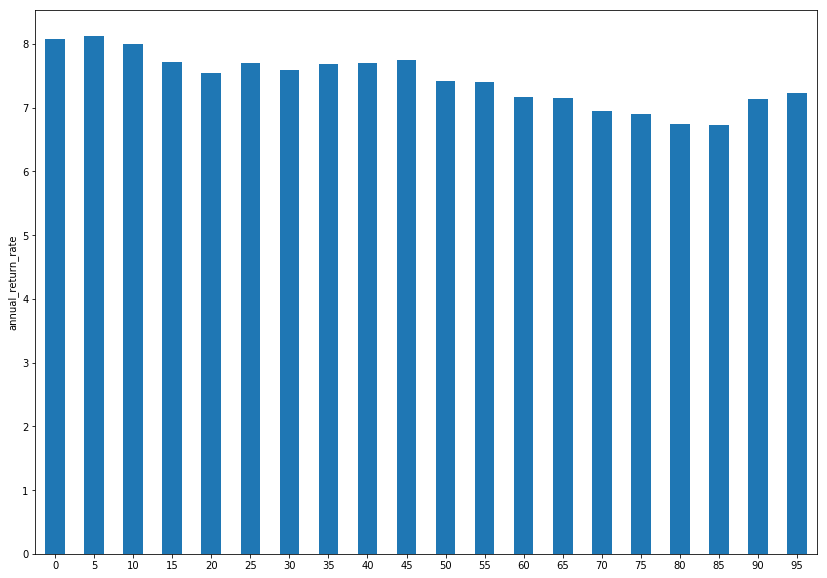

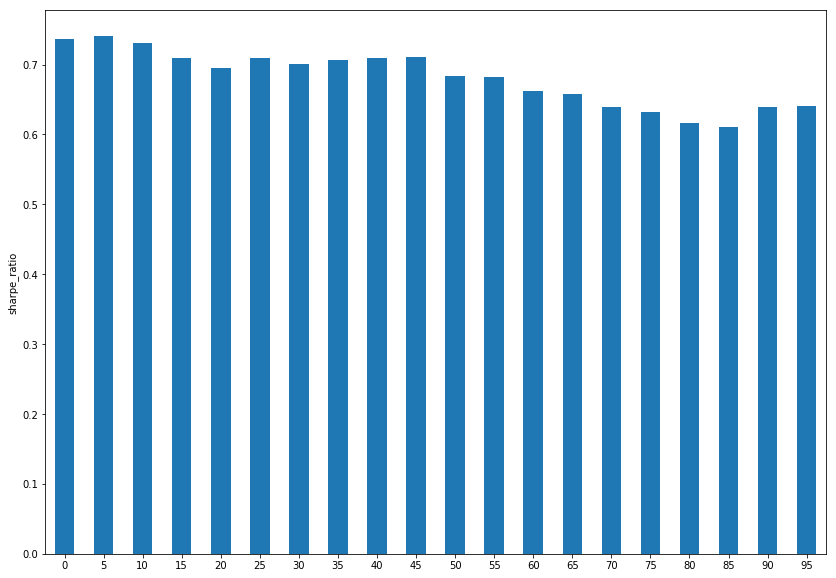

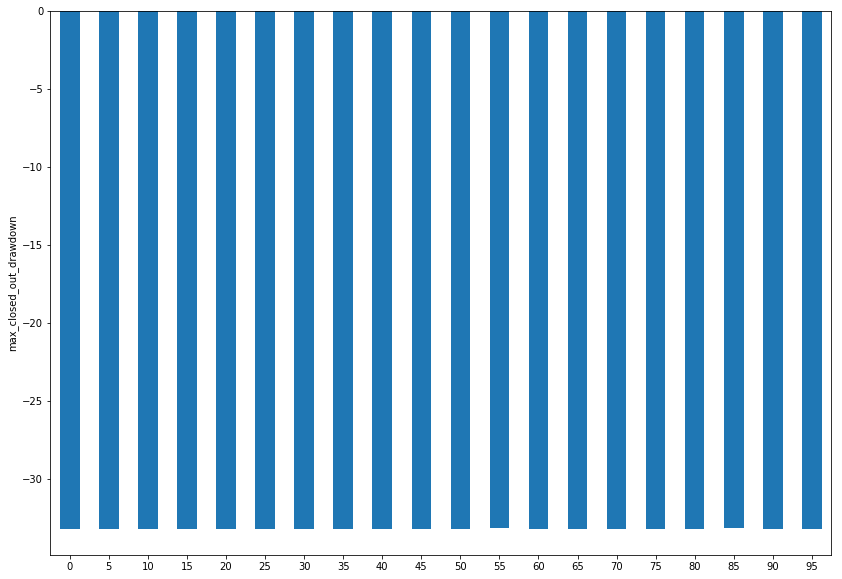

In [8]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[bands[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

1950-10-18 00:00:00 BUY  499 ^GSPC @ 20.01
2019-05-15 00:00:00 SELL 499 ^GSPC @ 2850.96


Equity curve

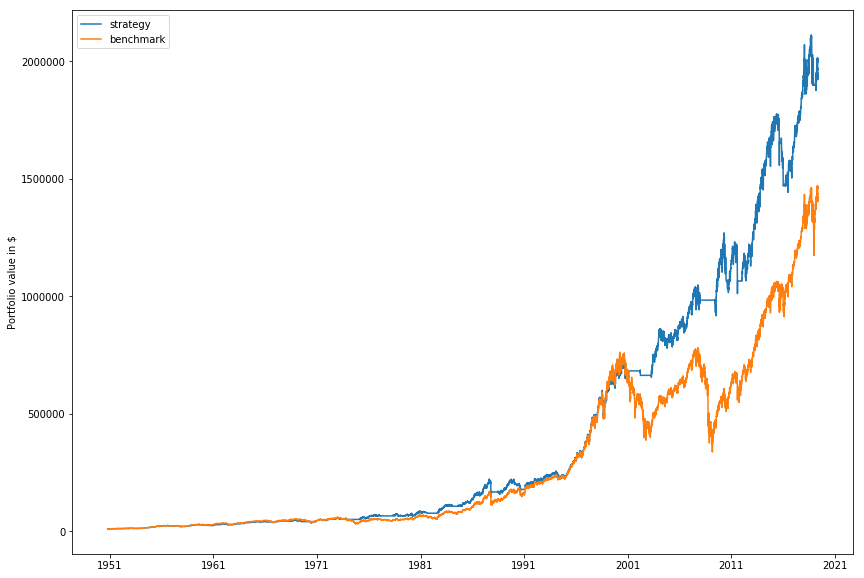

In [10]:
pf.plot_equity_curve(strategies['10'].dbal, benchmark=benchmark.dbal)